In [183]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import linear, relu, sigmoid

In [184]:
digits =  load_digits()

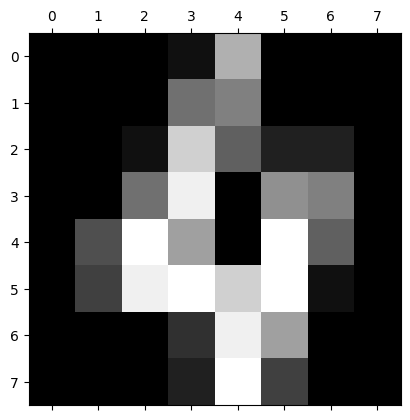

In [185]:
plt.matshow(digits.images[4])
plt.show()

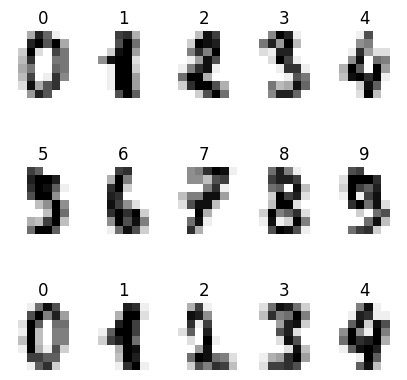

In [186]:
images_and_labels=list(zip(digits.images,digits.target))
plt.figure(figsize=(5,5))
for index,(image,label) in enumerate(images_and_labels[:15]):
    plt.subplot(3,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('%i' % label)

In [187]:
n=len(digits.images)
x=digits.images.reshape((n,-1))
y=digits.target

In [188]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [189]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [190]:
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)

In [191]:
def my_softmax(z):
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a

In [192]:
print(X_train.shape)
print(y_train.shape)

(1437, 64)
(1437, 1)


In [193]:
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [                
        tf.keras.layers.InputLayer((64,)),
        tf.keras.layers.Dense(25, activation="relu", name="L1"),
        tf.keras.layers.Dense(15, activation="relu", name="L2"),
        tf.keras.layers.Dense(10, activation="linear", name="L3")
    ], name = "my_model" 
)

In [194]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                1625      
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 2,175
Trainable params: 2,175
Non-trainable params: 0
_________________________________________________________________


In [195]:
[layer1, layer2, layer3] = model.layers

In [196]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X_train,y_train,
    epochs=40
)

Epoch 1/40
45/45 [==============================] - 1s 2ms/step - loss: 2.1051
Epoch 2/40
45/45 [==============================] - 0s 2ms/step - loss: 1.6451
Epoch 3/40
45/45 [==============================] - 0s 2ms/step - loss: 1.1913
Epoch 4/40
45/45 [==============================] - 0s 2ms/step - loss: 0.8131
Epoch 5/40
45/45 [==============================] - 0s 2ms/step - loss: 0.5617
Epoch 6/40
45/45 [==============================] - 0s 2ms/step - loss: 0.4155
Epoch 7/40
45/45 [==============================] - 0s 3ms/step - loss: 0.3289
Epoch 8/40
45/45 [==============================] - 0s 4ms/step - loss: 0.2716
Epoch 9/40
45/45 [==============================] - 0s 4ms/step - loss: 0.2287
Epoch 10/40
45/45 [==============================] - 0s 4ms/step - loss: 0.1931
Epoch 11/40
45/45 [==============================] - 0s 5ms/step - loss: 0.1661
Epoch 12/40
45/45 [==============================] - 0s 4ms/step - loss: 0.1428
Epoch 13/40
45/45 [==============================

1/1 [==============================] - 0s 91ms/step


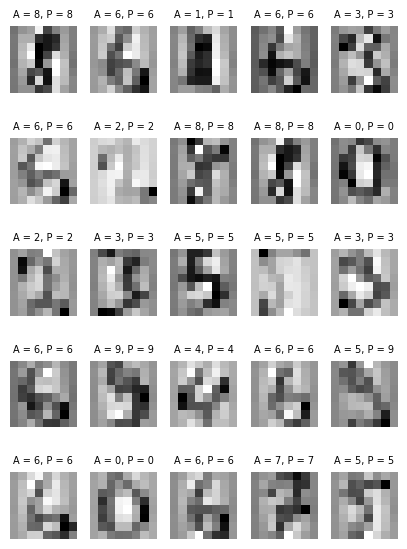

In [197]:

images_and_labels= []
#list(zip(digits.images,digits.target))
num,num2 = X_test.shape
for i in range(25):
    r_i = np.random.randint(0,num)
    m = X_test[r_i]
    n = y_test[r_i]
    prediction = model.predict(m.reshape(1,64))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    images_and_labels.append((m.reshape(8,8),n,yhat))


plt.figure(figsize=(5,7))
for index,(image,predct,actu) in enumerate(images_and_labels[:25]):
    plt.subplot(5,5,index+1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    ttl = "A = %i, P = %i" % (actu,predct)
    plt.title(ttl , fontsize=7)